<a href="https://colab.research.google.com/github/ninja-codes-droid/Machine_learning_project/blob/master/Testings/First_CNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building CNN - Convolution Neural Network

##Importing Libraries

In [1]:
import numpy as np   #For array of images 
import matplotlib.pyplot as plt # For Data Visualization

import seaborn as sns # used for statistical representation toped on matplotlib and integrated with pandas
#import keras  # Generate an error " No attribute datasets"  while importing dataset
import tensorflow.keras as tk #Keras is a high-level neural network library that runs on top of TensorFlow
#import tensorflow as tf
#from tensorflow import keras # Keras can be imported this way also the tk way too 
#from tensorflow.keras import layers


## Load Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=tk.datasets.fashion_mnist.load_data()  #importing the dataset and stored in different variables

In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape # Displaying the shape of data

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x_train[0]  # This is a single image 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

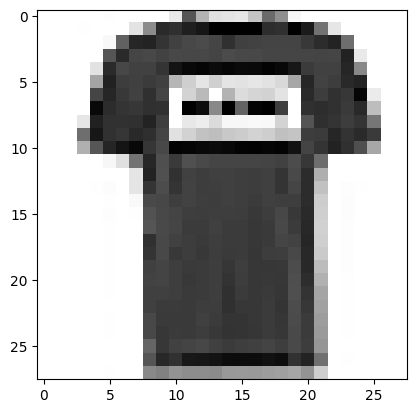

In [7]:
plt.imshow(x_train[1],cmap = "Greys") #Display sample images

In [8]:
y_test[1]

2

##Change dimention

In [9]:
x_train.ndim #CNN only takes 4 dim objects but our image has 3 dimentions

3

In [10]:
x_train=np.expand_dims(x_train, -1) #Making in a 4 dim object , every time it runs add a dimention
x_test=np.expand_dims(x_test, -1) 

In [11]:
x_train.ndim,x_train.shape,x_test.shape

(4, (60000, 28, 28, 1), (10000, 28, 28, 1))

## Feature scaling

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

##Split Dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state= 2020)

In [15]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((48000, 28, 28, 1),
 (48000,),
 (12000, 28, 28, 1),
 (12000,),
 (10000, 28, 28, 1),
 (10000,))

##Model building

In [16]:
#CNN - Convolutional Neural Network
model = tk.models.Sequential() # this generates  no  error there is no attribute Sequential
#model = keras.models.Sequential() 

In [17]:
model.add(tk.layers.Conv2D(32,(3,3),activation ='relu',input_shape=[28,28,1]))
model.add(tk.layers.MaxPooling2D(2,2))
model.add(tk.layers.Flatten()) # to get it in single vector
## Create Dense layer(Neural Network)
model.add(tk.layers.Dense(units=128,activation='relu'))
model.add(tk.layers.Dense(units=10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [19]:
#compile this model
#model.compile(optimizer = 'adam',loss = 'sparse_categorial_crossentropy',metrics=['accuracy'])  # when we use keras
model.compile(optimizer='adam',
              loss=tk.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train, epochs = 10 , batch_size = 512 , verbose = 1, validation_data =(x_val,y_val))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


94/94 [==============================] - 5s 12ms/step - loss: 0.6227 - accuracy: 0.7953 - val_loss: 0.4186 - val_accuracy: 0.8486
Epoch 2/10
94/94 [==============================] - 1s 7ms/step - loss: 0.3671 - accuracy: 0.8709 - val_loss: 0.3741 - val_accuracy: 0.8691
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3221 - accuracy: 0.8872 - val_loss: 0.3217 - val_accuracy: 0.8875
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.2978 - accuracy: 0.8945 - val_loss: 0.3255 - val_accuracy: 0.8838
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2780 - accuracy: 0.9007 - val_loss: 0.2983 - val_accuracy: 0.8959
Epoch 6/10
94/94 [==============================] - 1s 10ms/step - loss: 0.2567 - accuracy: 0.9084 - val_loss: 0.2902 - val_accuracy: 0.8991
Epoch 7/10
94/94 [==============================] - 1s 12ms/step - loss: 0.2417 - accuracy: 0.9144 - val_loss: 0.2834 - val_accuracy: 0.8988
Epoch 8/10
94/94 [==========

##Test the model

In [21]:
#model.predict(x_test[0]) # need to give 4d data
model.predict(np.expand_dims(x_test[0],axis = 0)).round(2)

1/1 [==============================] - 0s 101ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [22]:
np.argmax(model.predict(np.expand_dims(x_test[0],axis = 0)).round(2))

1/1 [==============================] - 0s 20ms/step


9

In [23]:
y_test[0]

9

In [24]:
y_pred = model.predict(x_test).round(2)

313/313 [==============================] - 1s 2ms/step


In [25]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.07, 0.  ]], dtype=float32)

In [26]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2762 - accuracy: 0.8997


[0.27616918087005615, 0.8996999859809875]

##Test Data With Lables

In [27]:
class_labels = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandel","Shirt","Sneaker","Bag","Ankel boot"]

In [28]:
class_labels

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandel',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankel boot']

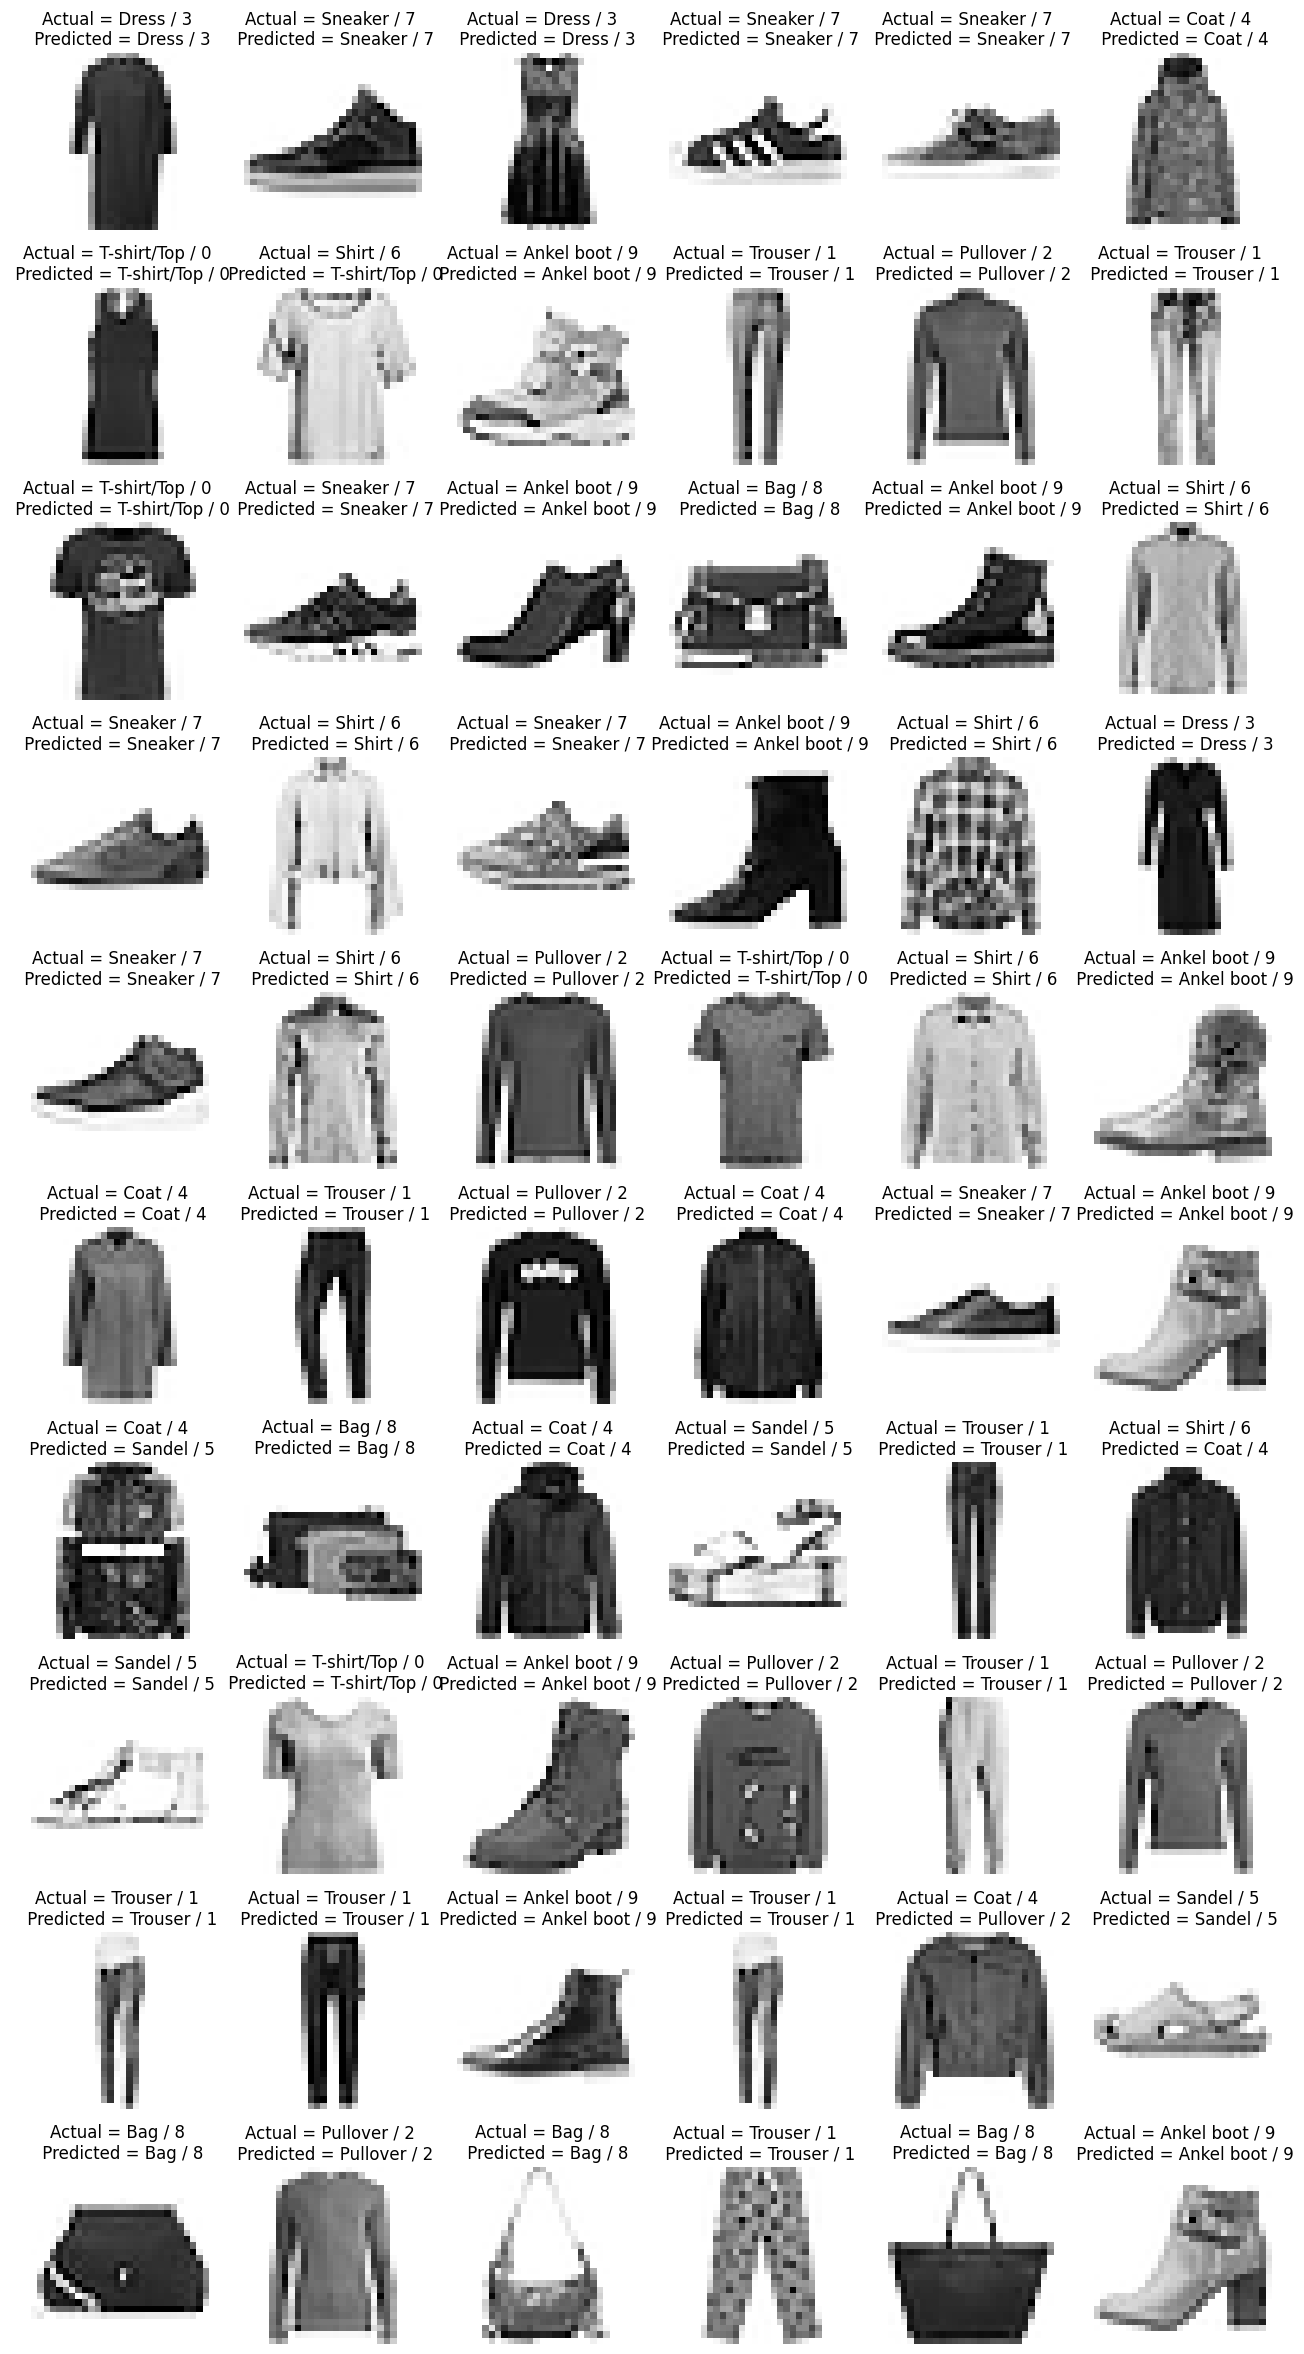

In [30]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap = "Greys")
  plt.title('Actual = {} / {} \n Predicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

##Confusion matrix & classification report


<Axes: >

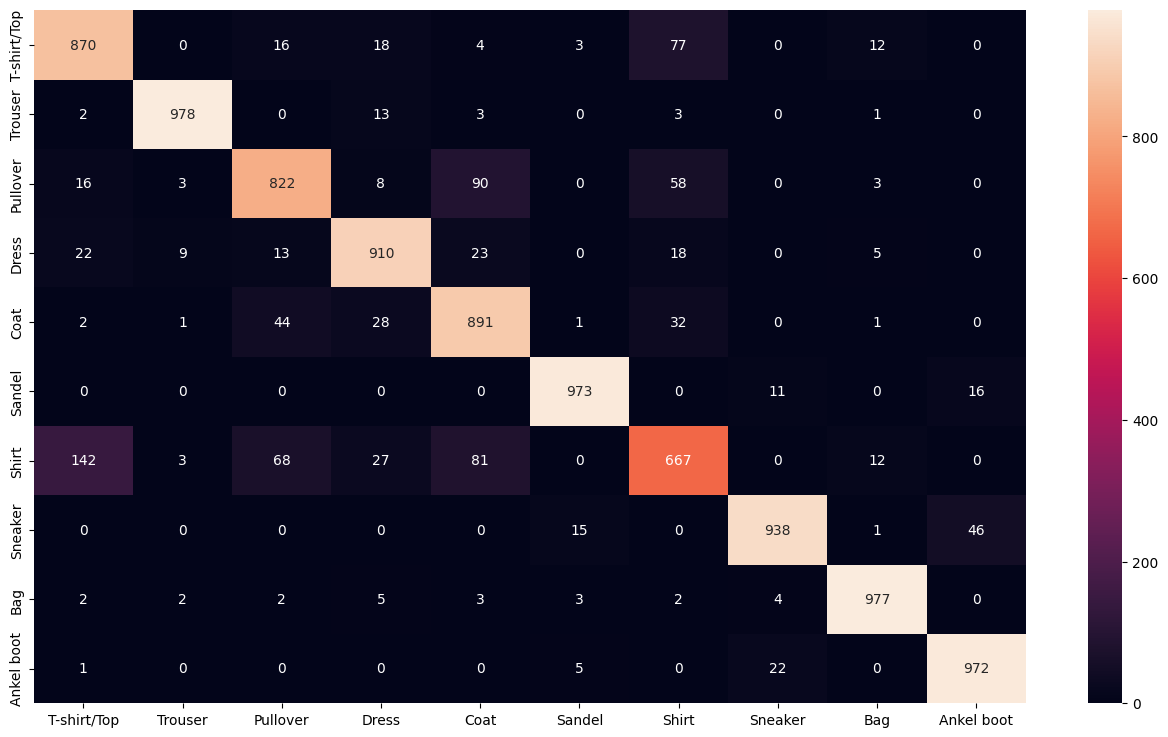

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test,y_pred_labels)

sns.heatmap(cm,annot = True , fmt = 'd' ,xticklabels = class_labels,yticklabels=class_labels)

In [33]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/Top       0.82      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.82      0.84      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.81      0.89      0.85      1000
      Sandel       0.97      0.97      0.97      1000
       Shirt       0.78      0.67      0.72      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankel boot       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



##Save Model and deployment

In [34]:
model.save('Fashion_classification_cnn_model.h5') # to save in google colab

In [41]:
path = '/content/drive/MyDrive/Colab Notebooks/Fashion_classification_cnn_model_v1.h5'
model.save(path)  # to save in google drive

In [36]:
model_deloy = tk.models.load_model('Fashion_classification_cnn_model.h5')

In [38]:
model_deloy.predict(x_test).round(2)

313/313 [==============================] - 1s 3ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.12, 0.07, 0.  ]], dtype=float32)

In [39]:
model_deloy.predict(np.expand_dims(x_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 87ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [40]:
class_labels[np.argmax(model_deloy.predict(np.expand_dims(x_test[0],axis=0)))]

1/1 [==============================] - 0s 18ms/step


'Ankel boot'